<a href="https://colab.research.google.com/github/icarusrodrigues/queue-simulations/blob/main/Random_MMC_Queue_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Random M/M/C Queue**

A Random M/M/C queue is a queuing model used to analyze the behavior of queuing systems with multiple servers (C servers) and customer arrival following a Poisson process (M) and exponential service times (M), where the order of customer service is random.

In [1]:
!pip install simpy

In [2]:
import numpy as np
import simpy as sp
import matplotlib.pyplot as plt
import random as rd

In [3]:
class Customer:

  def __init__(self, id, arrive):
    self.id = id
    self.arrive = arrive
    self.service = 0

  def do_service(self, service):
    self.service = service

  def __repr__(self) -> str:
    return f"id={self.id}, arrive={self.arrive}, service={self.service}"


In [10]:
class RandomMMCQueue:

  def __init__(self, arrival_rate, service_rate, max_resources, horizon, show=False):
    self.env = sp.Environment()
    self.n = 0
    self.arrival_rate = arrival_rate
    self.service_rate = service_rate
    self.max_resources = max_resources
    self.horizon = horizon
    self.show = show
    self.people = []
    self.queue_history = []
    self.next_id = 0
    self.times_queue = []
    self.people_queue = []

  def arrive(self):
    while True:
      yield self.env.timeout(np.random.exponential(1/self.arrival_rate))
      self.n += 1

      customer = Customer(self.next_id, self.env.now)

      self.people.append(customer)
      self.queue_history.append(customer)
      self.next_id +=1

      self.times_queue.append(self.env.now)
      self.people_queue.append(self.n)

      if self.show:
        print(f"Someone arrive!\n- n = {self.n}, t = {self.env.now})\n")

      if self.n == 1:
        self.env.process(self.service())

  def service(self):
    while self.n > 0:
      yield self.env.timeout(np.random.exponential(1/self.service_rate))

      if self.n - self.max_resources >= 0:
        self.n -= self.max_resources

        people_served = rd.sample(self.people, k=self.max_resources)

        for served in people_served:
          served.do_service(self.env.now)
          self.people.remove(served)

      else:
        self.n = 0

        for served in self.people:
          served.do_service(self.env.now)
        self.people.clear()

      self.times_queue.append(self.env.now)
      self.people_queue.append(self.n)

      if self.show:
        print(f"Someone was attended to!\n- n = {self.n}, t = {self.env.now})\n")

  def show_historic(self):
    for customer in self.queue_history:
      print(f"- {customer}")

  def run_simulation(self):
    self.env.process(self.arrive())

    if self.n > 0:
      self.env.process(self.service())

    self.env.run(until=self.horizon)

    self.show_historic()

    print("End of simulation!")

In [11]:
arrival_rate = 7
service_rate = 5
max_resources = 3
horizon = 30

random_mmc_queue = RandomMMCQueue(arrival_rate, service_rate, max_resources, horizon, True)

random_mmc_queue.run_simulation()

Someone arrive!
- n = 1, t = 0.17291241080742656)

Someone was attended to!
- n = 0, t = 0.32712488777344007)

Someone arrive!
- n = 1, t = 0.38956828763062135)

Someone arrive!
- n = 2, t = 0.541162823716474)

Someone arrive!
- n = 3, t = 0.6447816024840529)

Someone arrive!
- n = 4, t = 0.7437572947204354)

Someone arrive!
- n = 5, t = 0.8468588147905746)

Someone arrive!
- n = 6, t = 0.8519938486192783)

Someone arrive!
- n = 7, t = 0.8725533712721493)

Someone arrive!
- n = 8, t = 0.8822991467299162)

Someone arrive!
- n = 9, t = 1.1949311251083667)

Someone was attended to!
- n = 6, t = 1.298722973243636)

Someone arrive!
- n = 7, t = 1.3489099810349163)

Someone arrive!
- n = 8, t = 1.4505536490575097)

Someone arrive!
- n = 9, t = 1.5026627132780197)

Someone arrive!
- n = 10, t = 1.5484920911597435)

Someone arrive!
- n = 11, t = 1.5577373797226832)

Someone arrive!
- n = 12, t = 1.742014717645082)

Someone was attended to!
- n = 9, t = 1.7590875477765375)

Someone arrive!
- n 

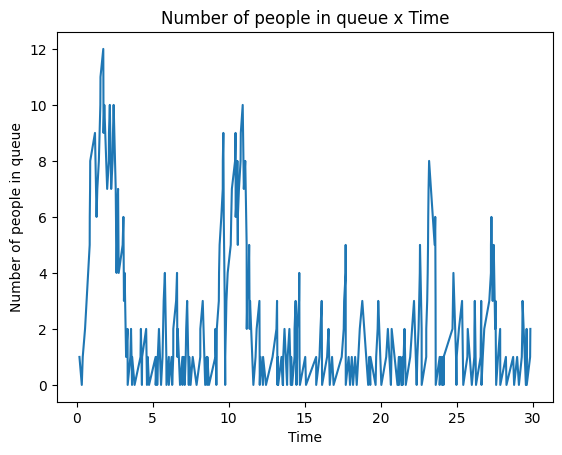

In [12]:
plt.plot(random_mmc_queue.times_queue, random_mmc_queue.people_queue)
plt.title("Number of people in queue x Time")
plt.xlabel("Time")
plt.ylabel("Number of people in queue")
plt.show()